# Введение в pandas. Анализируем клипы на YouTube

Подгрузим нужные пакеты

In [4]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками

## Об обозначениях

Данные удобно представимы в виде таблиц. Обычно по строкам таких таблиц находятся наблюдения (`observations`), а по столбцам - признаки (`variables`).  

<img src="images/table.png" width="500">

Не перестанем повторять, что все в _python_ является объектом. Для таких табличек тоже есть свой тип объекта - `DataFrame` из пакета pandas.  

`DataFrame` содержит в себе еще несколько объектов: объекты `Index` и `Series`
* `Index` - это то, каким образом пронумерованы ваши строки. Обычно индексом являются числа от 0 до кол-ва строк, но могут быть и что-то другое, например, на картинке выше индексом выступают модели автомобилей
* `Series` - это объект для отдельной колонки датафрейма

## 1. Смотрим на данные 

Будем тренироваться на собранных данных по клипам ютуба. Датасет содержит следующие колонки:   

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались вот этим крутым дата-шрушером: https://github.com/FUlyankin).

In [3]:
# подгружаем данные
df = pd.read_csv("data/youtube_data_short.csv", sep = "\t")

In [4]:
# смотрим на первые 5 строк
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [5]:
# смотрим на последние 5 строк
df.tail()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
19119,♫♪Мы расстаемся ♫♪ Бутырка new2019,2.0,0.0,11.0,shanson,бутырка,1107.0,NaN,NaN,44
19120,❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...,94.0,431.0,1837.0,classic,classical_channel,391836.0,37.0,1.0,239
19121,モスクワライブショー ' 17,4872.0,15494.0,30603.0,rap,элджей,1187340.0,1788.0,352.0,339
19122,舞梅鬼 - 新年好宝贝 / Mumiy Troll - Happy New Year ...,59.0,10.0,260.0,rock,мумий_тролль,10147.0,19.0,0.0,997
19123,🎄#премьера песни!!! 2019г(вы не спешите говори...,1.0,0.0,22.0,shanson,бутырка,1566.0,NaN,NaN,65


In [8]:
# смотрим на размерность данных (кол-во строк, кол-во столбцов)
df.shape

(19124, 10)

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, rock, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

In [10]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

In [12]:
# подробнее
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 19124 non-null  object 
 1   commentCount          18914 non-null  float64
 2   dislikeCount          18850 non-null  float64
 3   likeCount             18850 non-null  float64
 4   music_style           19124 non-null  object 
 5   performer             19124 non-null  object 
 6   viewCount             19123 non-null  float64
 7   commentators_uniq     12314 non-null  float64
 8   comments_obscene_cnt  12314 non-null  float64
 9   video_age             19124 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


## 2. Достаем часть информации

1. Достаем колонки. Результат $-$ объект типа Series

In [21]:
# 1ый способ
df['title']

0                                "#2Маши "Свободные линии"
1                "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2        "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3                   "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                           "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
                               ...                        
19119                  ♫♪Мы расстаемся ♫♪  Бутырка new2019
19120    ❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [22]:
# 2ой способ
df.title

0                                "#2Маши "Свободные линии"
1                "ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )
2        "EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MIC...
3                   "Earth song" премия МУЗ-тВ 2010 (LIVE)
4                           "FAKE" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)
                               ...                        
19119                  ♫♪Мы расстаемся ♫♪  Бутырка new2019
19120    ❤ 2 ЧАСА ❤ МОЦАРТ Для Младенцев - Колыбельная ...
19121                                      モスクワライブショー ' 17
19122    舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year ...
19123    🎄#премьера песни!!! 2019г(вы не спешите говори...
Name: title, Length: 19124, dtype: object

In [23]:
type(df['title'])

pandas.core.series.Series

2. Достаем значения из колонки. Результат $-$ нумпаевский массив

In [29]:
df.title.values

array(['"#2Маши "Свободные линии"',
       '"ALARM" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )',
       '"EARTH SONG"  SERGEY LAZAREV. DEDICATED TO MICHAEL JACKSON ( Cover version)',
       ..., "モスクワライブショー ' 17",
       "舞梅鬼   -  新年好宝贝 / Mumiy Troll - Happy New Year Baby (Fan's  Video)",
       '🎄#премьера песни!!! 2019г(вы не спешите говорит)группа.Бутырка.'],
      dtype=object)

In [30]:
type(df.title.values)

numpy.ndarray

3. Достаем отдельные строки либо подтаблицы

In [33]:
# loc - по названию строк и столбцов 
df.loc[[45, 50], ['title', 'likeCount']]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


In [36]:
# iloc - по номеру строки и столбца
df.iloc[[45, 50], [0, 3]]

,title,likeCount
45,"""Глаза - убийцы"". Первые впечатления",23.0
50,"""ДОстояние РЕспублики"" - Игорь Николаев (1)",80.0


4. Условные срезы

In [45]:
# достаем несколько колонок
df[['title', 'performer']].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [47]:
# либо так
useful_cols = ['title', 'performer']
df[useful_cols].head()

,title,performer
0,"""#2Маши ""Свободные линии""",2маши
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",лазарев
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",лазарев
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",лазарев
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",лазарев


In [42]:
# смотрим на клипы с нулевым кол-вом лайков
df.loc[df.likeCount == 0].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
429,1. конф.,0.0,0.0,0.0,rock,несчастный_случай,17.0,NaN,NaN,293
464,16:45 (без четверти пять),0.0,0.0,0.0,rock,несчастный_случай,91.0,NaN,NaN,293
481,2. конф.,0.0,0.0,0.0,rock,несчастный_случай,11.0,NaN,NaN,293
519,3. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293
558,4. конф.,0.0,0.0,0.0,rock,несчастный_случай,9.0,NaN,NaN,293


In [43]:
# тоже самое, но хотим не все колонки для экономии места
df.loc[df.likeCount == 0, ['title', 'performer']].head()

,title,performer
429,1. конф.,несчастный_случай
464,16:45 (без четверти пять),несчастный_случай
481,2. конф.,несчастный_случай
519,3. конф.,несчастный_случай
558,4. конф.,несчастный_случай


In [49]:
# несколько условий
df.loc[(df.likeCount > 0) & (df.dislikeCount == 0)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


In [51]:
# либо так
first_cond = df.likeCount > 0
second_cond = df.dislikeCount == 0

df.loc[first_cond & second_cond].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
70,"""КРАЯ РОДНЫЕ"" гр. ""Воровайки"", слова Виктории ...",0.0,0.0,1.0,shanson,воровайки,418.0,NaN,NaN,479
74,"""Король и Шут"" - 15 лет",5.0,0.0,62.0,rock,король_и_шут,6547.0,5.0,0.0,3817
87,"""Мумий Тролль"" уходит в море. Отход ""Седова"".",3.0,0.0,70.0,rock,мумий_тролль,6327.0,3.0,0.0,2482
93,"""НЕ УБЕРЕГЛА ЛЮБОВЬ"" (Audio) гр. ""Воровайки"", ...",0.0,0.0,2.0,shanson,воровайки,985.0,NaN,NaN,499


## 3. Описательные статистики

**Хотим все и сразу**

In [69]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


In [14]:
# тоже самое, но над переменными типа object
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


**Минимум и максимум**

In [65]:
print(df.likeCount.max())
print(df.likeCount.min())

1686810.0
0.0


In [59]:
# посмотрим на клип, который набрал максимальное кол-во лайков
mx = df.likeCount.max()

df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


**Среднее, медиана и мода**

<img src="images/means.jpg" width="400">

In [74]:
print(df.video_age.mean())
print(df.video_age.median())
print(df.video_age.mode())

1389.7726417067558
1213.0
0    267
dtype: int64


**Квантили и распределение**

In [75]:
# квантиль
df.video_age.quantile(0.99)

3730.0

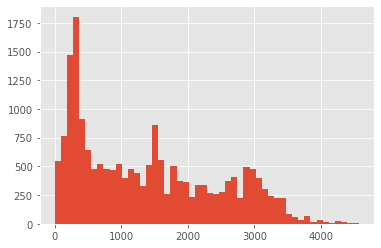

In [76]:
# рисуем полностью распределение 
df.video_age.hist(bins=50);

**Дисперсия и стандартное отклонение**

In [79]:
df.likeCount.var()

1513445598.6358452

In [80]:
df.likeCount.std()

38903.02814223907

## 4. Group by

Итак, мы научились с вами находить среднее в целом по всему датасету. Но что бы было, если бы нам нужно узнать среднее кол-во лайков в каждом жанре? 

Немного подумав, мы бы могли ответить на поставленный вопрос с помощью срезов: 

In [83]:
# сначала получаем, какие жанры у нас есть
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [84]:
df[df.music_style == 'popsa'].likeCount.mean()

7492.273791654158

In [85]:
df[df.music_style == 'rap'].likeCount.mean()

26802.456253089473

Однако жанров у нас в датасете достаточно много, поэтому дублировать такой код для каждого жанра может показаться совсем неоптимальным решением. 

К счастью, для таких задач и были придуманы __группировки__:

In [86]:
df.groupby('music_style')['likeCount'].mean()

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

**Посмотрим теперь на возможности, связанные с groupby**

In [87]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.216495   485
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    17.040346   347

[111 rows x 4 columns]

In [89]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg({'likeCount': 'min', 
                                                                              'dislikeCount': 'max'})

likeCount  dislikeCount
music_style performer                                 
classic     classical_channel        1.0       52892.0
estrada     агутин                   1.0          14.0
            басков                   0.0       11997.0
            буйнов                   0.0          13.0
            ваенга                   1.0         580.0
...                                  ...           ...
shanson     жека                     0.0        3586.0
            ирина_круг               7.0       12906.0
            михаил_круг              0.0        3063.0
            трофимов                 0.0        1037.0
            шуфутинский              0.0        1512.0

[111 rows x 2 columns]

## 5. Другие полезные приемы

**Создание новых колонок**

In [8]:
df['likes_uplift'] = (df['likeCount'] - df['dislikeCount']) / df['dislikeCount']

df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age', 'likes_uplift'],
      dtype='object')

**Удаление колонок**

In [9]:
df.drop('likes_uplift', axis=1, inplace=True)

In [10]:
df.columns

Index(['title', 'commentCount', 'dislikeCount', 'likeCount', 'music_style',
       'performer', 'viewCount', 'commentators_uniq', 'comments_obscene_cnt',
       'video_age'],
      dtype='object')

**Ренейминг колонок**

In [38]:
df.rename(columns={'title':'Title'}, inplace=True)

In [40]:
df.head()

,Title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


**Сброс индексов**

In [16]:
df.iloc[[10, 20, 30, 40], [0, 1]].reset_index(drop=True)

,title,commentCount
0,"""LAZERBOY""( Michael Yousher videoremix) Сергей...",5.0
1,"""Аве Мария"" Весь зал плакал. Вика 11 лет",3865.0
2,"""Большая семья"" Игоря Николаева - часть 2",3.0
3,"""Всё, что было"". Начало.",23.0


**Уникальные значения**

In [41]:
df['music_style'].value_counts()

rock       5888
estrada    4151
popsa      3339
shanson    2061
rap        2028
indi       1359
classic     298
Name: music_style, dtype: int64

In [42]:
df['music_style'].value_counts(normalize=True)

rock       0.307885
estrada    0.217057
popsa      0.174597
shanson    0.107770
rap        0.106045
indi       0.071063
classic    0.015583
Name: music_style, dtype: float64

In [44]:
df['music_style'].unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [46]:
df['music_style'].nunique()

7

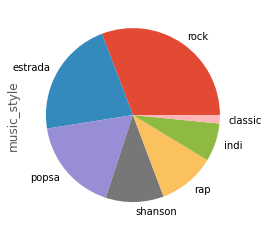

In [48]:
df['music_style'].value_counts().plot(kind='pie');

**apply**

In [19]:
df.title.apply(len)

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

In [20]:
# средняя длина названия
np.mean(df.title.apply(len))

35.293871574984315

**Работа со строками**

* `.isin()` $–$ для того, чтобы оставить лишь те строки, категории которой лежат в некотором списке
* `.str` $–$ для того, чтобы использовать методы, которые есть у строк
* `.str.startswith()` $–$ для того, чтобы оставить строки, которые начинаются с определенного текста
* `.str.contains()` $–$ для того, чтобы оставить строки, содержание которых имеет определенный текст
* _и так далее, подробно методы строк изучали ранее_

In [32]:
interested_styles = ['rock', 'rap']

df['music_style'].isin(interested_styles)

0        False
1        False
2        False
3        False
4        False
         ...  
19119    False
19120    False
19121     True
19122     True
19123    False
Name: music_style, Length: 19124, dtype: bool

In [34]:
# делаем условный срез
df[df['music_style'].isin(interested_styles)].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


In [37]:
# вытаскиваем всех перформеров, начинающихся с буквы б
df[df['performer'].str.startswith('б')].head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
42,"""Глаза - убийцы"". Первые впечатления",3.0,11.0,32.0,popsa,барских,6845.0,16.0,1.0,2849
43,"""Глаза - убийцы"". Первые впечатления",4.0,13.0,7.0,popsa,барских,2657.0,16.0,1.0,2850
44,"""Глаза - убийцы"". Первые впечатления",11.0,40.0,42.0,popsa,барских,11713.0,16.0,1.0,2850
45,"""Глаза - убийцы"". Первые впечатления",1.0,10.0,23.0,popsa,барских,5621.0,16.0,1.0,2850
46,"""Глаза - убийцы"". Первые впечатления",5.0,13.0,46.0,popsa,барских,7316.0,16.0,1.0,2850


**Создание DataFrame из словаря**

In [18]:
d = {'names': ['Max', 'Rita', 'Sasha', 'Boris'],
    'score': [8, 7, 10, 4]}

pd.DataFrame(d)

,names,score
0,Max,8
1,Rita,7
2,Sasha,10
3,Boris,4


**Замена значений**

In [24]:
my_df = pd.DataFrame({'name':['Max', 'Rita', 'Sasha', 'Boris'], 'sex': ['M', 'F', 'F', 'M']})
my_df

,name,sex
0,Max,M
1,Rita,F
2,Sasha,F
3,Boris,M


In [27]:
d = {'M': True, 'F': False}

my_df['is_male'] = my_df.sex.map(d)
my_df

,name,sex,is_male
0,Max,M,True
1,Rita,F,False
2,Sasha,F,False
3,Boris,M,True


In [28]:
np.mean(my_df.is_male)

0.5